In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from google.colab import drive

# HW 2 (Problem 1a)
# Sophia Godfrey
# Student ID: 801149485

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
filePath = '/content/drive/MyDrive/Colab Notebooks/Housing.csv'
df = pd.read_csv(filePath)

# Display first 5 rows
df.head()

Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Select inputs for Problem 1a
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values  # keep 1D

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [6]:
# Split dataset: 80% train, 20% validation
np.random.seed(8)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=8)

In [7]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1/(2*m)) * np.sum(errors**2)

In [8]:
# Gradient Descent
def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m_train = len(y_train)
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta)
        errors = predictions_train - y_train
        theta -= (learning_rate / m_train) * X_train.T.dot(errors)

        training_loss_history[i] = compute_cost(X_train, y_train, theta)
        validation_loss_history[i] = compute_cost(X_val, y_val, theta)

    return theta, training_loss_history, validation_loss_history

In [9]:
# Testing different learning rates
learning_rates = [0.01, 0.05, 0.1]
iterations = 25
best_theta = None
best_lr = None
lowest_val_loss = float('inf')
best_train_loss = None
best_val_loss = None

for lr in learning_rates:
    theta_init = np.zeros(X_train.shape[1])
    theta_lr, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val, theta_init, lr, iterations)

    if val_loss[-1] < lowest_val_loss:
        lowest_val_loss = val_loss[-1]
        best_theta = theta_lr
        best_lr = lr
        best_train_loss = train_loss
        best_val_loss = val_loss

print("Best learning rate:", best_lr)
print("Optimal parameters (theta):", best_theta)

Best learning rate: 0.01
Optimal parameters (theta): [2.00375082e+136 1.19857184e+140 6.00373480e+136 2.64779731e+136
 3.72723449e+136 1.61081227e+136]


/tmp/ipython-input-2263340696.py:6: RuntimeWarning: overflow encountered in square
  return (1/(2*m)) * np.sum(errors**2)


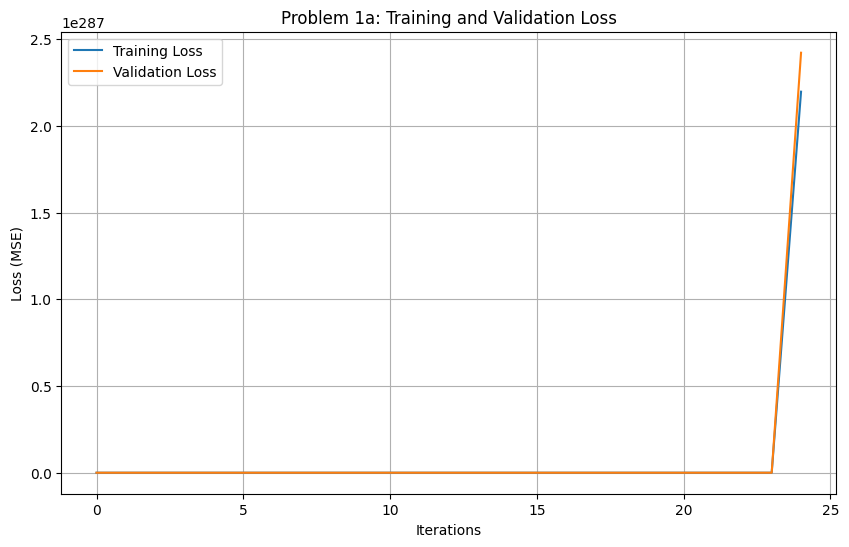

In [10]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), best_train_loss, label='Training Loss')
plt.plot(range(iterations), best_val_loss, label='Validation Loss')
plt.title('Problem 1a: Training and Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Select input variables for Problem 1b
features_b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
              'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
              'parking', 'prefarea']

X = df[features_b].map(lambda x: 1 if x == "yes" else (0 if x == "no" else x)).values
y = df['price'].values  # keep 1D

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split dataset: 80% train, 20% validation
np.random.seed(8)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=8)

In [12]:
# Cost function (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

In [13]:
# Gradient descent
def gradient_descent(X_train, y_train, X_val, y_val, theta, learning_rate, iterations):
    m_train = len(y_train)
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)

    for i in range(iterations):
        predictions_train = X_train.dot(theta)
        errors = predictions_train - y_train
        theta -= (learning_rate / m_train) * X_train.T.dot(errors)

        training_loss_history[i] = compute_cost(X_train, y_train, theta)
        validation_loss_history[i] = compute_cost(X_val, y_val, theta)

    return theta, training_loss_history, validation_loss_history

In [14]:
# Test multiple learning rates
learning_rates = [0.01, 0.05, 0.1]
iterations = 25
best_theta = None
best_lr = None
lowest_val_loss = float('inf')
best_train_loss = None
best_val_loss = None

for lr in learning_rates:
    theta_init = np.zeros(X_train.shape[1])
    theta_lr, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val, theta_init, lr, iterations)

    if val_loss[-1] < lowest_val_loss:
        lowest_val_loss = val_loss[-1]
        best_theta = theta_lr
        best_lr = lr
        best_train_loss = train_loss
        best_val_loss = val_loss

print("Best learning rate:", best_lr)
print("Optimal parameters (theta):", best_theta)

Best learning rate: 0.01
Optimal parameters (theta): [2.00375240e+136 1.19857278e+140 6.00373954e+136 2.64779940e+136
 3.72723743e+136 1.80609859e+136 3.97253256e+135 7.05660517e+135
 6.46012519e+134 7.03651933e+135 1.61081354e+136 5.19435609e+135]


/tmp/ipython-input-1868212521.py:6: RuntimeWarning: overflow encountered in square
  return (1 / (2 * m)) * np.sum(errors ** 2)


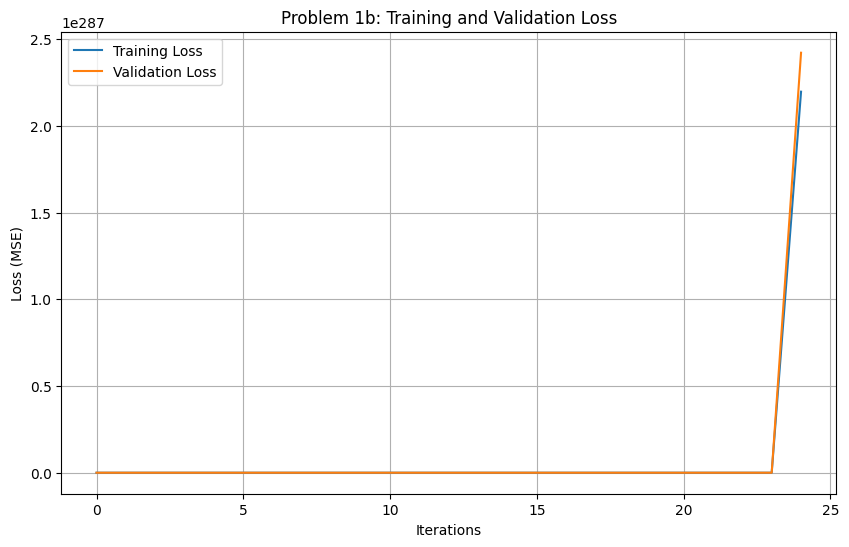

In [15]:
# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), best_train_loss, label='Training Loss')
plt.plot(range(iterations), best_val_loss, label='Validation Loss')
plt.title('Problem 1b: Training and Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()